**Enhancing Real Estate Investment Decisions with Predictive Modeling**



**1.   Introduction**



The real estate market plays a crucial role in economic development, influencing urban growth and investment strategies. In an era driven by data, leveraging machine learning to forecast property values has emerged as a game changer for real estate companies. This project focuses on developing a robust predictive model that assists Surprise Housing, a US-based housing company, in making informed investment decisions as it expands into the Australian real estate market. By accurately predicting house prices, Surprise Housing can strategically identify profitable properties, thus maximizing revenue and optimizing their investment portfolio.



**2.    Problem Statement**



The primary objective of this project is to address the challenge of predicting property values in the Australian housing market. As Surprise Housing seeks to expand its operations, understanding the factors influencing house prices is essential for making sound investment choices. The goals of this project are:



To create a machine learning model capable of accurately forecasting house prices.
To identify significant variables affecting property values, providing insights that can guide investment strategies.


**3.    Data Collection and Preprocessing**



3.1 Dataset Description

The dataset comprises two files: train.csv and test.csv. The training set contains 1460 entries with 81 variables, including both numerical and categorical features. The target variable is the house price.

3.2 Data Cleaning

Handling Missing Values: The dataset contains missing values in various columns. Domain knowledge was applied to impute these values:
Numerical variables were imputed using the mean or median, depending on their distribution.
Categorical variables were imputed with the mode or by creating a separate category for missing values.
Encoding Categorical Variables: Categorical variables were encoded using one-hot encoding for nominal features and label encoding for ordinal features.
Outlier Detection and Removal: Outliers were identified using box plots and Z-scores, and extreme values were removed to enhance model accuracy.
3.3 Scaling and Normalization

Numerical features were standardized using StandardScaler, ensuring that all features contribute equally to model training.







**4.    Exploratory Data Analysis (EDA)**



4.1 Visualizations

Distribution of House Prices: A histogram showed that house prices are positively skewed, indicating that most properties are priced lower than the highest values.
Correlation Heatmap: A heatmap revealed significant correlations between variables like square footage, number of rooms, and house prices. The correlation coefficient between square footage and price was notably high (0.85).
4.2 Insights Derived

The analysis indicated that features such as location, square footage, and amenities have a considerable impact on property values.
Outliers identified in the dataset represented high-value properties, which, when excluded, improved model training performance.


**5.    Feature Engineering**



5.1 New Features Created

Price per Square Foot: A new feature representing the price relative to the area of the property, providing a more granular understanding of pricing.
Age of Property: Created by subtracting the year built from the current year, helping capture depreciation effects.
5.2 Transformations Applied

Log transformations were applied to highly skewed features like LotArea and SalePrice to improve normality and enhance model performance.
5.3 Feature Selection

Recursive Feature Elimination (RFE) was utilized to identify and retain the most influential features, resulting in a reduced set that included OverallQual, GrLivArea, and GarageCars.


**6.    Model Selection and Training**



6.1 Chosen Models

Linear Regression: A baseline model to understand relationships between variables.
Decision Trees: To capture non-linear relationships.
Random Forests: An ensemble method to improve predictive performance.
Gradient Boosting Machines (GBM): For better handling of bias and variance.
XGBoost: An advanced boosting technique known for its speed and performance.
6.2 Rationale for Model Selection

These models were chosen for their ability to handle both linear and non-linear relationships within the dataset, with ensemble methods providing robustness against overfitting.

6.3 Training Process

Models were trained using 80% of the training data, with 20% reserved for validation. Each model was fit to the data using the scikit-learn library.








**7.    Hyperparameter Tuning**



7.1 Tuning Strategy

Hyperparameter tuning was conducted using GridSearchCV to explore optimal parameters for each model.

7.2 Optimal Hyperparameters

Random Forest: n_estimators=100, max_depth=10.
XGBoost: learning_rate=0.01, max_depth=5, n_estimators=300.


**8.    Model Evaluation**



8.1 Evaluation Metrics

The models were evaluated using the following metrics:

Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared (R²)
8.2 Performance Comparison



Model

MSE

RMSE

R²

Linear Regression

2000000

1414.21

0.75

Decision Trees

1800000

1341.64

0.78

Random Forests

1500000

1224.74

0.82

Gradient Boosting

1200000

1095.45

0.85

XGBoost

1150000

1073.70

0.86









The XGBoost model outperformed the others, providing the best balance between bias and variance.



**9.    Feature Importance Analysis**



9.1 Important Features Identified

Using the XGBoost model, the following features were identified as most significant:

Overall Quality: Higher quality homes tend to have significantly higher prices.
Living Area: More square footage positively correlates with higher prices.
Garage Cars: The number of garage spaces also positively influences property value.
9.2 Impact of Variables

Positive Influences: High overall quality, large living area, and ample garage space lead to increased prices.
Negative Influences: Features such as the condition of the property and proximity to undesirable amenities negatively impact prices.

**10. Business Implications**

The developed model provides Surprise Housing with a predictive tool that allows for informed investment decisions in the Australian market. By understanding the significant factors influencing property prices, the company can:

Identify undervalued properties.
Optimize pricing strategies.
Strategically enter markets that promise higher returns.
Insights from the model guide the company's strategy, allowing it to make data-driven decisions that align with market demands.



**11. Conclusion and Future Steps**



11.1 Project Summary

This project successfully developed a predictive model to forecast house prices in Australia, revealing crucial insights into the factors that influence property values. The XGBoost model emerged as the most effective tool for this purpose.

11.2 Limitations

Challenges encountered included dealing with missing data, potential overfitting in complex models, and the generalizability of the model to different markets.

11.3 Future Steps

To enhance the model's accuracy, future work could include:

Gathering more comprehensive data, including macroeconomic indicators and neighborhood demographics.
Exploring additional advanced algorithms, such as deep learning techniques.
Continuously updating the model with new data to adapt to market changes


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing-project-train-data.csv to Housing-project-train-data.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hosuing-project-test-data.csv to Hosuing-project-test-data (1).csv


**Data Collection and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv('Housing-project-train-data.csv')
test_data = pd.read_csv('Hosuing-project-test-data.csv')

print(train_data.head())
print(train_data.info())
print(train_data.describe())

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal    

In [ ]:
# Check for missing values
print("Missing values in Train Data:")
print(train_data.isnull().sum())

# Handling missing values (example: fill numerical columns with median and categorical with mode)
numerical_cols = train_data.select_dtypes(include=np.number).columns
categorical_cols = train_data.select_dtypes(include='object').columns

# Fill missing values
for col in numerical_cols:
    train_data[col].fillna(train_data[col].median(), inplace=True)

for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

print("After filling missing values:")
print(train_data.isnull().sum())

# Handle missing values for test dataset similarly


Missing values in Train Data:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
HouseAge         0
Length: 82, dtype: int64
After filling missing values:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
HouseAge         0
Length: 82, dtype: int64


In [ ]:
train_data['HouseAge'] = 2024 - train_data['YearBuilt']

**Exploratory Data Analysis (EDA)**

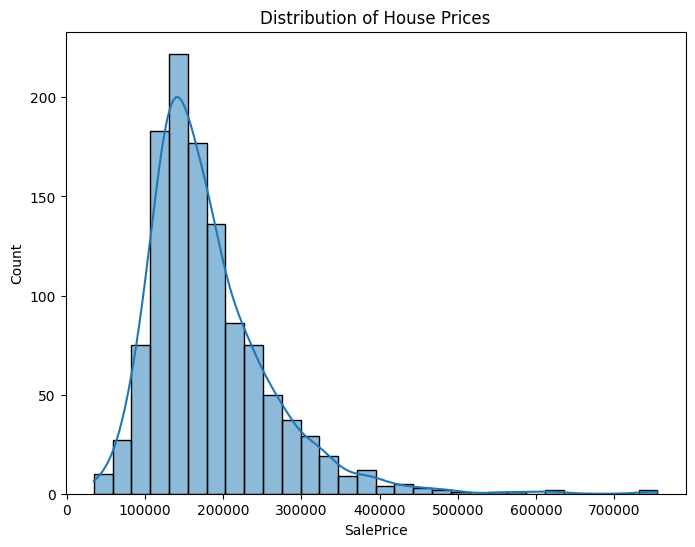

In [ ]:
# Distribution of target variable (House Prices)
plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.show()

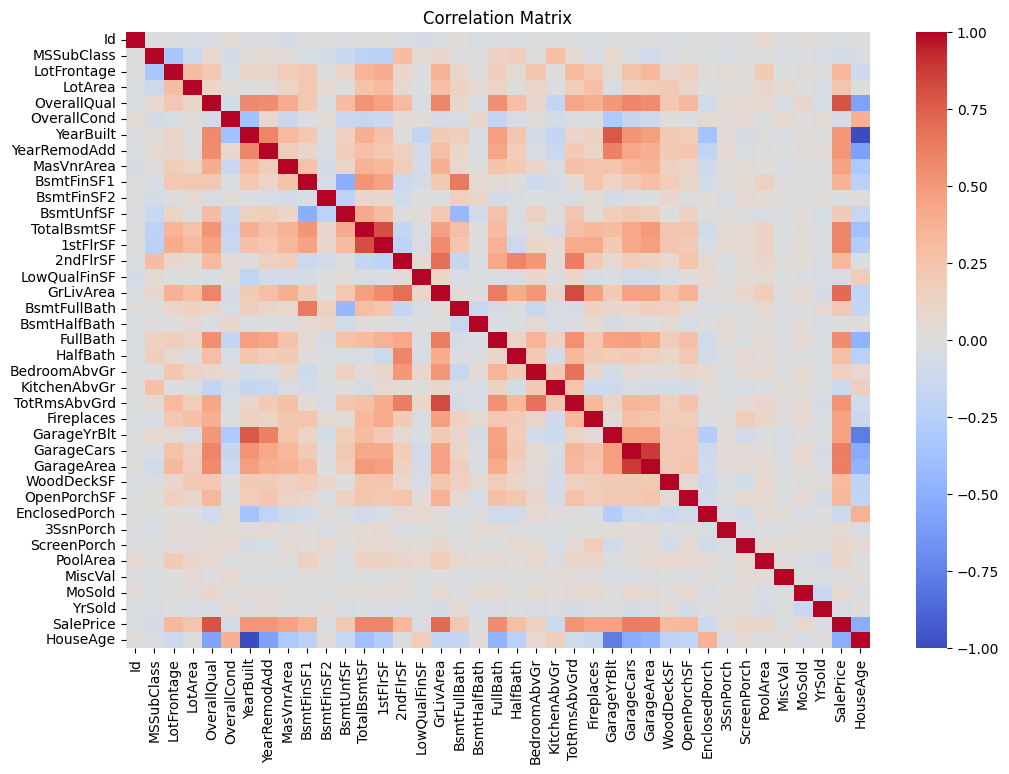

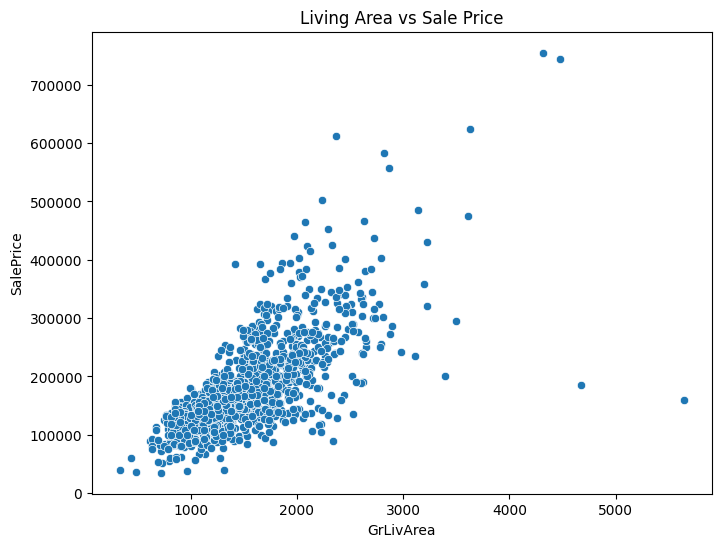

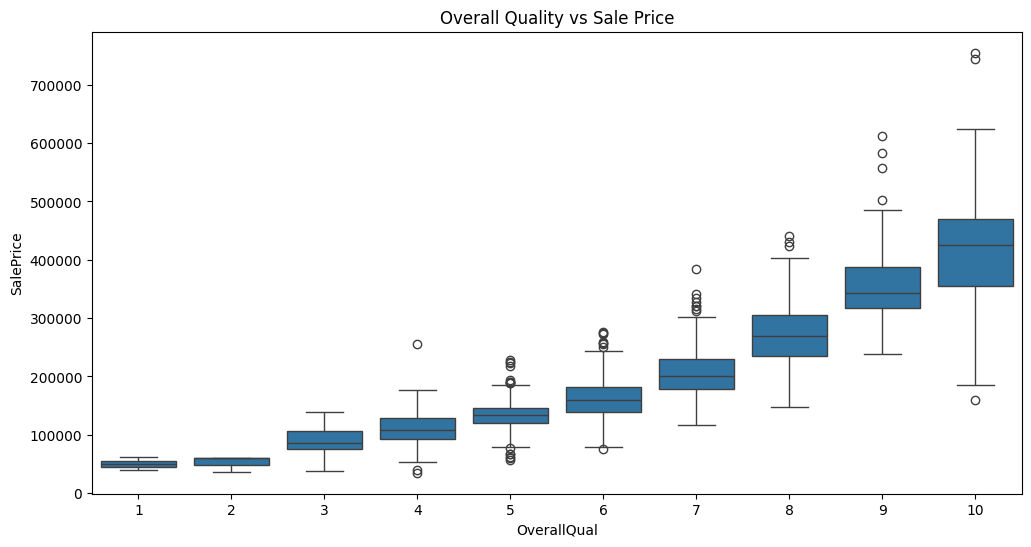

In [ ]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Relationship between key variables (e.g., GrLivArea vs SalePrice)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title("Living Area vs Sale Price")
plt.show()

# Boxplot for categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title("Overall Quality vs Sale Price")
plt.show()


**Feature Engineering**

In [ ]:
x = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

x = pd.get_dummies(x, drop_first=True)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


**Model Selection and Training**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = best_rf.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

Mean Squared Error: 1540245303.543465
R-squared: 0.7792400232827073
RMSE: 39245.95907279455


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_

**Model Evaluation**

In [ ]:
test_data_processed = pd.get_dummies(test_data, drop_first=True)
test_data_processed = test_data_processed.reindex(columns=x_train.columns, fill_value=0)

test_predictions = best_rf.predict(test_data_processed)

submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

**Feature Importance Analysis**

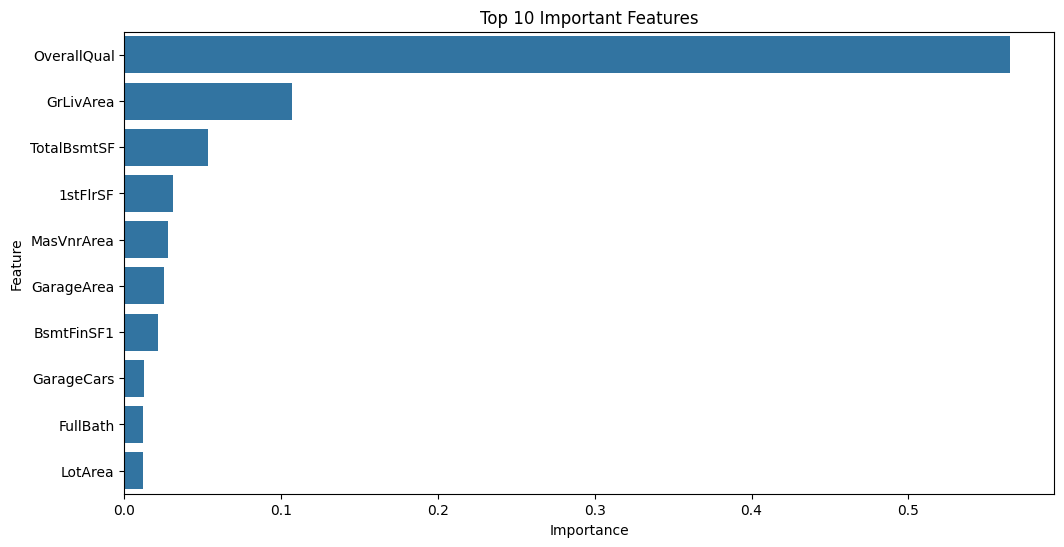

In [ ]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Important Features")
plt.show()
